In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('Clean_Data/Real_Estate.csv')
df.head()

,Unnamed: 0,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
2,4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East
3,7,2009-01-03,2009,Norwalk,172620.0,409000.0,?,Detached House,3,3,1004.0,1.025953,South
4,10,2009-01-04,2009,Norwalk,208880.0,370000.0,Single Family,Detached House,3,2,1063.0,1.025953,South


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6680 non-null   object 
 1   Year               6680 non-null   int64  
 2   Locality           6680 non-null   object 
 3   Estimated Value    6680 non-null   float64
 4   Sale Price         6680 non-null   float64
 5   Property           6680 non-null   object 
 6   Residential        6680 non-null   object 
 7   num_rooms          6680 non-null   int64  
 8   num_bathrooms      6680 non-null   int64  
 9   carpet_area        6680 non-null   float64
 10  property_tax_rate  6680 non-null   float64
 11  Face               6680 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 626.4+ KB


In [7]:
df.columns

Index(['Date', 'Year', 'Locality', 'Estimated Value', 'Sale Price', 'Property',
       'Residential', 'num_rooms', 'num_bathrooms', 'carpet_area',
       'property_tax_rate', 'Face'],
      dtype='object')

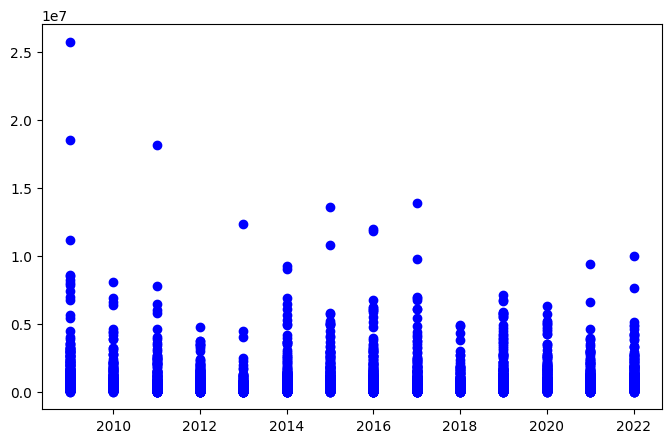

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(x=df['Year'],y=df['Sale Price'],color='blue')
# plt.legend(df['Locality'])
plt.show()

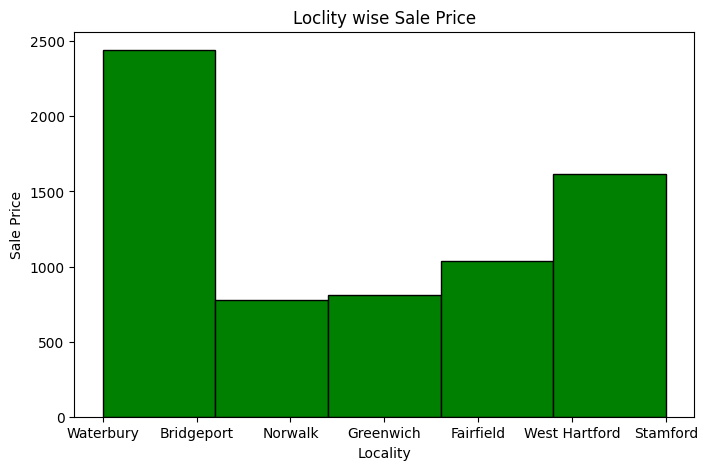

In [23]:
plt.figure(figsize=(8,5))
plt.hist(x=df['Locality'],bins=5,color='green', edgecolor= 'Black')
plt.xlabel('Locality')
plt.ylabel('Sale Price')
plt.title('Loclity wise Sale Price')
plt.show()

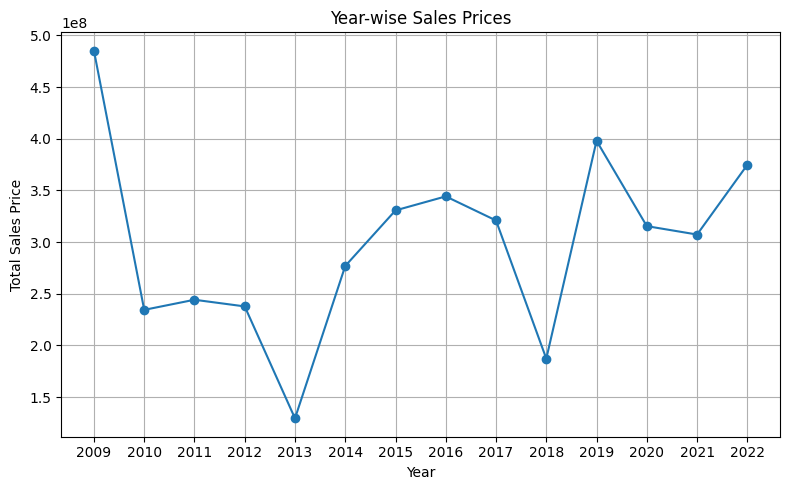

In [27]:
sales_by_year = df.groupby('Year')['Sale Price'].sum()
plt.figure(figsize=(8,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o', linestyle="-")
plt.title('Year-wise Sales Prices')
plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.grid(True)
plt.xticks(sales_by_year.index) 
plt.tight_layout()
plt.show()

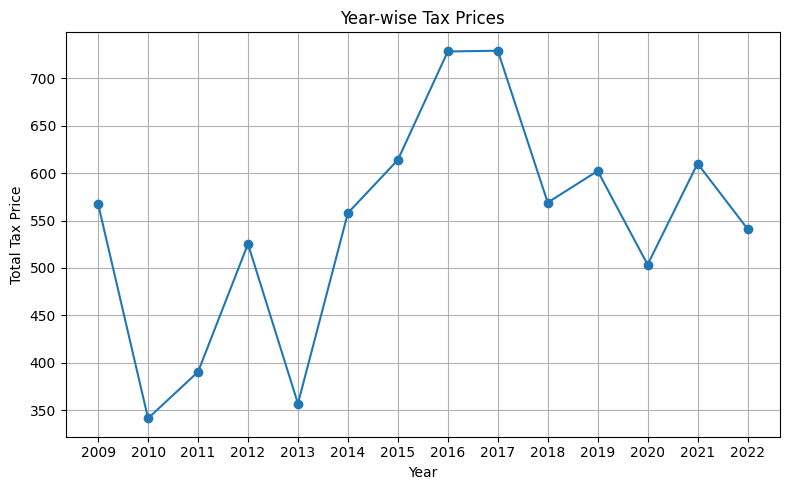

In [29]:
tax_by_year = df.groupby('Year')['property_tax_rate'].sum()
plt.figure(figsize=(8,5))
plt.plot(tax_by_year.index,tax_by_year.values,marker='o', linestyle="-")
plt.title('Year-wise Tax Prices')
plt.xlabel('Year')
plt.ylabel('Total Tax Price')
plt.grid(True)
plt.xticks(tax_by_year.index) 
plt.tight_layout()
plt.show()

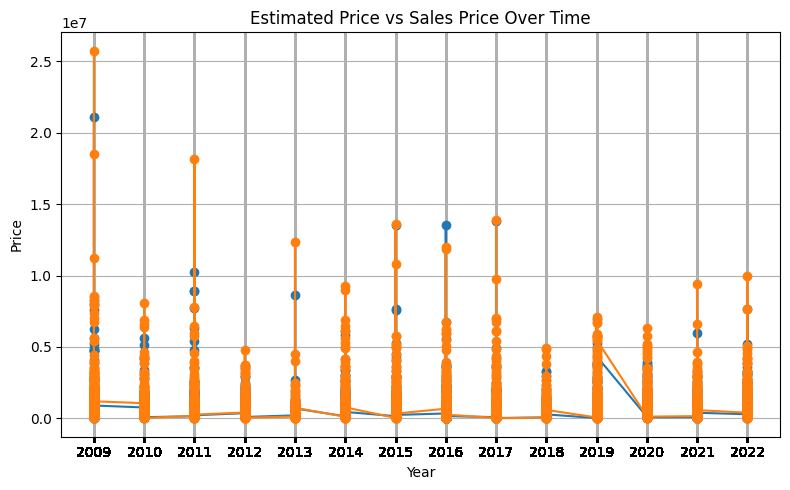

In [30]:
plt.figure(figsize=(8,5))
plt.plot(df['Year'],df['Estimated Value'], marker='o', linestyle='-')
plt.plot(df['Year'],df['Sale Price'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Estimated Price vs Sales Price Over Time')
plt.grid(True)
plt.xticks(df['Year']) 
plt.tight_layout()
plt.show()

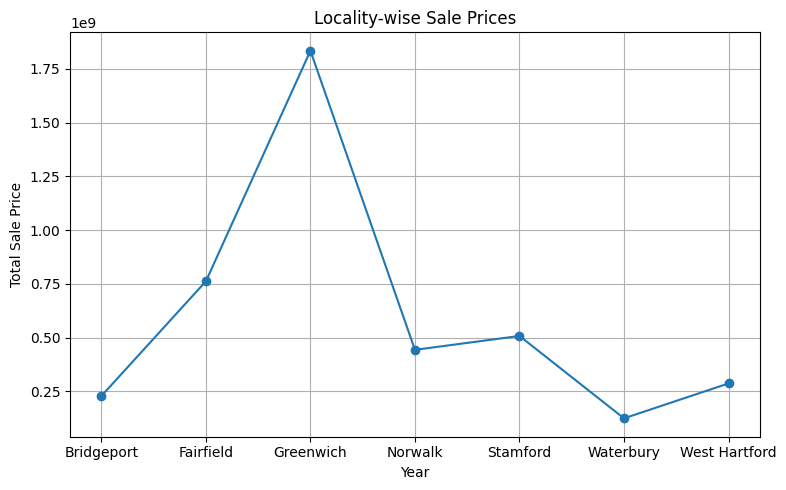

In [32]:
locality_wise_sale_price = df.groupby('Locality')['Sale Price'].sum()
plt.figure(figsize=(8,5))
plt.plot(locality_wise_sale_price.index,locality_wise_sale_price.values,marker='o', linestyle="-")
plt.title('Locality-wise Sale Prices')
plt.xlabel('Year')
plt.ylabel('Total Sale Price')
plt.grid(True)
plt.xticks(locality_wise_sale_price.index) 
plt.tight_layout()
plt.show()

In [39]:
set_of_row = set(df['Locality'])
set_of_row
list_of_row = list(set_of_row)
list_of_row

['Greenwich',
 'Norwalk',
 'Waterbury',
 'West Hartford',
 'Fairfield',
 'Stamford',
 'Bridgeport']

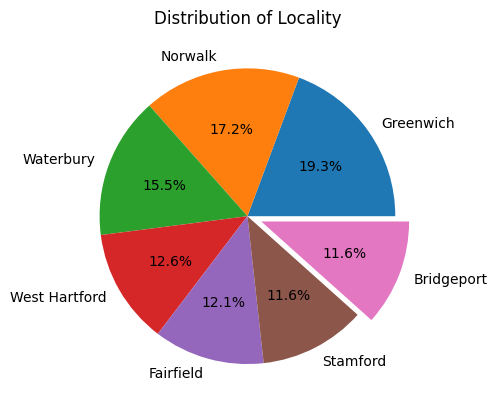

In [40]:
plt.pie(df['Locality'].value_counts(),autopct='%1.1f%%',labels=list_of_row,explode=[0,0,0,0,0,0,0.1])
plt.title('Distribution of Locality')
plt.show()

In [44]:
df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
2,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East
3,2009-01-03,2009,Norwalk,172620.0,409000.0,?,Detached House,3,3,1004.0,1.025953,South
4,2009-01-04,2009,Norwalk,208880.0,370000.0,Single Family,Detached House,3,2,1063.0,1.025953,South


In [45]:
df['Property'].value_counts()

Property
Single Family    4554
?                1188
Two Family        568
Three Family      319
Four Family        51
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
x = df.loc[:,['carpet_area']]
y = df['Sale Price']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5344, 1), (1336, 1), (5344,), (1336,))

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)
y_pred

array([645038.36554742, 725986.935649  , 690448.53901904, ...,
       629243.52260077, 523615.51039505, 468333.56008178])

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

In [62]:
error = mean_absolute_percentage_error(y_pred,y_test)
error

0.8858194493755883

In [69]:
print("Accuracy of Linear Regression: %.2f"%((1-error)*100),'%')

Accuracy of Linear Regression: 11.42 %


In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rfr = RandomForestRegressor()

In [72]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
y_predict = rfr.predict(x_test)
y_predict

array([ 945189.05593689, 1210537.30843073,  735042.16353651, ...,
       1122959.75245493, 1687091.11111111,  220768.0952381 ])

In [75]:
rfr_error = mean_absolute_percentage_error(y_predict,y_test)
rfr_error

0.9751987436295284

In [77]:
print("Accuracy of Random Forest Regressor: %.2f"%((1-rfr_error)*100),'%')

Accuracy of Random Forest Regressor: 2.48 %
